In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN- Training and Classification


In [2]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

import tensorflow
from warnings import filterwarnings

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenerate_train = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
datagenerate_test = ImageDataGenerator(rescale=1./255)



In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
print(os.listdir('/content/drive/MyDrive/Tumor/dataset'))
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
datagenerate_train = ImageDataGenerator(rescale=1./255)
datagenerate_test = ImageDataGenerator(rescale=1./255)
training_set = datagenerate_train.flow_from_directory(
    '/content/drive/MyDrive/Tumor/dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
Validation_set = datagenerate_test.flow_from_directory(
    '/content/drive/MyDrive/Tumor/dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
print(f"Training set size: {len(training_set)}")
print(f"Validation set size: {len(Validation_set)}")
model_hist = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=Validation_set,
    validation_steps=len(Validation_set)
)
classifier.save('/content/drive/MyDrive/Tumor/brain_tumer.h5')
classifier.summary()


['no', 'yes']
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Training set size: 8
Validation set size: 8


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.6003 - loss: 0.6232 - val_accuracy: 0.8024 - val_loss: 0.4891
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 570ms/step - accuracy: 0.8130 - loss: 0.4780 - val_accuracy: 0.7984 - val_loss: 0.4473
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.7928 - loss: 0.4456 - val_accuracy: 0.8300 - val_loss: 0.4273
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 638ms/step - accuracy: 0.8202 - loss: 0.4342 - val_accuracy: 0.8419 - val_loss: 0.3746
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.8310 - loss: 0.3598 - val_accuracy: 0.8458 - val_loss: 0.3266
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.8875 - loss: 0.2878 - val_accuracy: 0.8696 - val_loss: 0.3156
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 433ms/step - accuracy: 0.9053 - loss: 0.2492 - val_accuracy: 0.9170 - val_loss: 0.2277
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.9455 - loss: 0.2027 - val_accuracy: 0.9644 - val_loss: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,439,653 (9.31 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,436 (6.20 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Not Affected :1.00


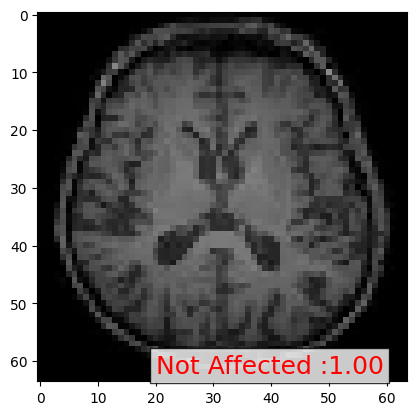

In [8]:
from tensorflow.keras.models import load_model
classifier_model= load_model('/content/drive/MyDrive/Tumor/brain_tumer.h5')
import tensorflow
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
input_image= image.load_img('/content/drive/MyDrive/Tumor/dataset/no/10-no.jpg', target_size=(64, 64))
img_1= image.img_to_array(input_image)
img_1 = img_1/255
img_1 = np.expand_dims(img_1, axis=0)
prediction = classifier_model.predict(img_1, batch_size=None,steps=1)
if(prediction[:,:]>0.5):
    output ='Affetecd :%1.2f'%(prediction[0,0])
    plt.text(20, 62,output,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    output ='Not Affected :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,output,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
print(output)
plt.imshow(input_image)
plt.show()




# Segmentation

In [9]:
import json
import math
import random
import imutils
import itertools
import matplotlib
import numpy as np
import skimage.draw
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.cm as cm
from skimage.io import imread
import matplotlib.pyplot as plt
import PIL.ImageDraw as ImageDraw


from IPython.display import clear_output


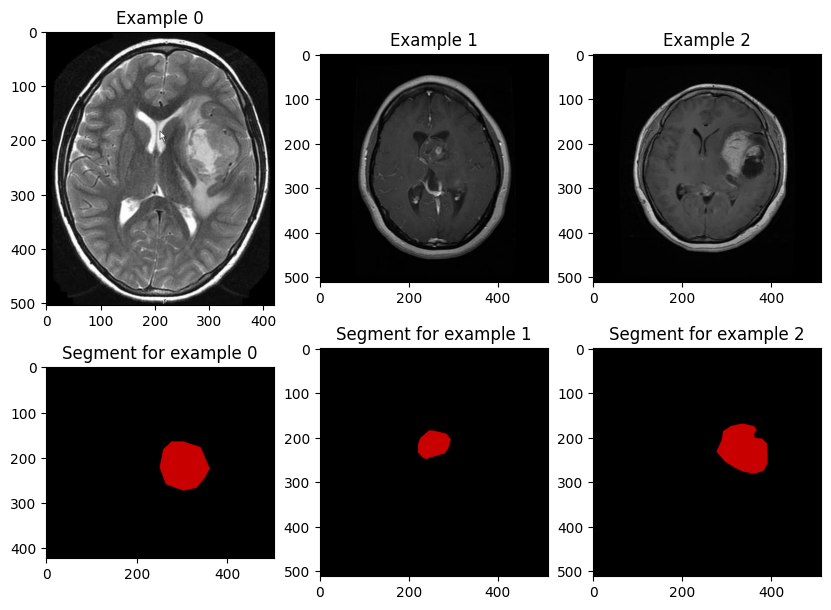

In [11]:
DATASET_DIR ='/content/drive/MyDrive/Tumor/New folder/brain-tumor-segmentation-main/brain_tumor_data/'
examples = [Image.open(DATASET_DIR + 'train/1.jpg'),Image.open(DATASET_DIR + 'train/10.jpg'),Image.open(DATASET_DIR+'train/100.jpg')]
examplesSeg = ['1.jpg51382','10.jpg19225','100.jpg20477']
fig = plt.figure(figsize=(10,14))
for i in range(0, len(examples)):
    a = fig.add_subplot(1, 3, i+1)
    imgplot = plt.imshow(examples[i])
    a.set_title('Example '+str(i))
with open(DATASET_DIR+'train/annotations.json') as json_file:
    data = json.load(json_file)
    for i in range(0,len(examplesSeg)):
        coord = list(zip(data[examplesSeg[i]]['regions'][0]['shape_attributes']['all_points_x'],data[examplesSeg[i]]['regions'][0]['shape_attributes']['all_points_y']))
        image = Image.new("RGB", np.asarray(examples[i]).shape[0:2])
        draw = ImageDraw.Draw(image)
        draw.polygon((coord), fill=200)
        a = fig.add_subplot(2, 3, 3+i+1)
        imgplot = plt.imshow(image)
        a.set_title('Segment for example ' + str(i))

Tumor 1 (Example 1.jpg51382):
Width: 111 pixels
Height: 109 pixels
Tumor Area: 12099 square pixels


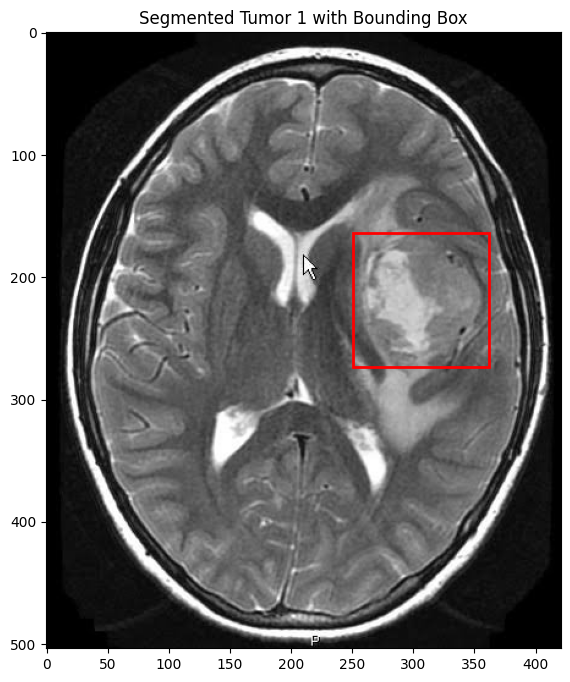

Tumor 2 (Example 10.jpg19225):
Width: 74 pixels
Height: 65 pixels
Tumor Area: 4810 square pixels


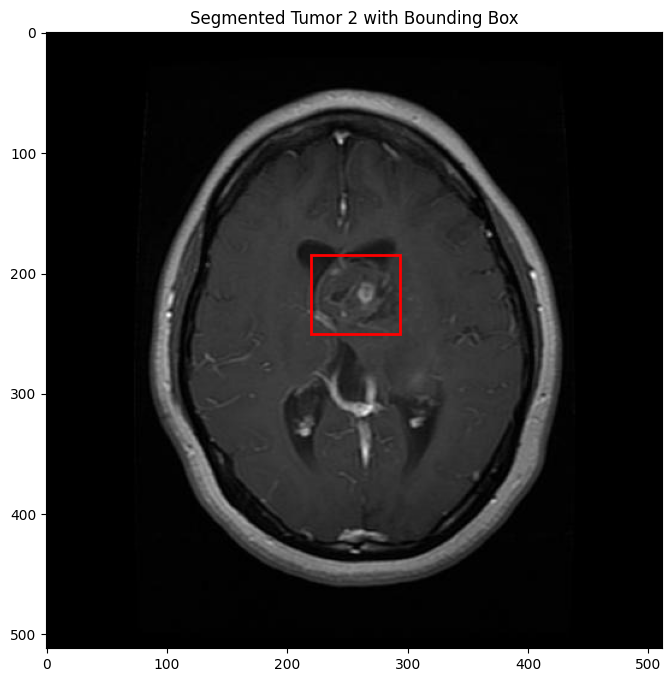

Tumor 3 (Example 100.jpg20477):
Width: 115 pixels
Height: 114 pixels
Tumor Area: 13110 square pixels


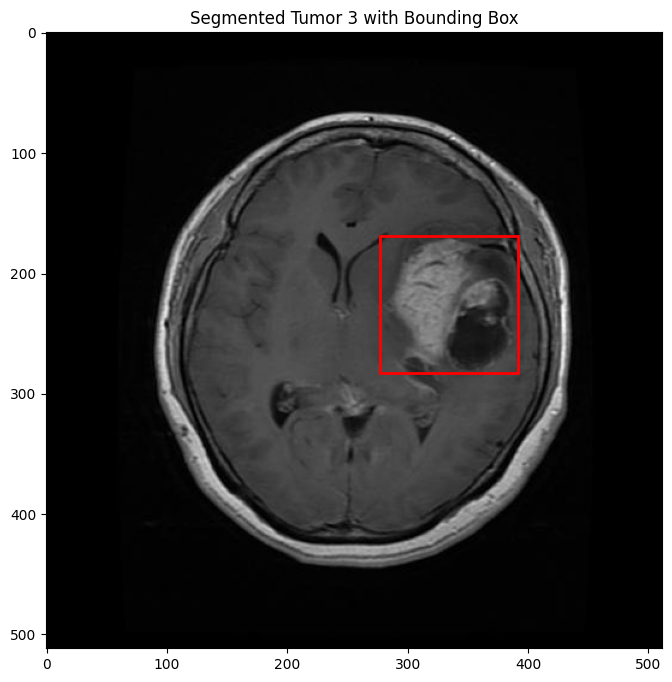

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.measure import regionprops, label
with open(DATASET_DIR + 'train/annotations.json') as json_file:
    data = json.load(json_file)
    for i in range(len(examplesSeg)):
        coord = list(zip(data[examplesSeg[i]]['regions'][0]['shape_attributes']['all_points_x'],
                         data[examplesSeg[i]]['regions'][0]['shape_attributes']['all_points_y']))
        image_shape = np.asarray(examples[i]).shape
        segmented_image = Image.new("L", image_shape[0:2], 0)
        draw = ImageDraw.Draw(segmented_image)
        draw.polygon(coord, fill=255)
        segmented_image_np = np.array(segmented_image)
        labeled_image = label(segmented_image_np)
        regions = regionprops(labeled_image)
        for region in regions:
            min_row, min_col, max_row, max_col = region.bbox
            width = max_col - min_col
            height = max_row - min_row
            area = width * height
            print(f'Tumor {i+1} (Example {examplesSeg[i]}):')
            print(f'Width: {width} pixels')
            print(f'Height: {height} pixels')
            print(f'Tumor Area: {area} square pixels')
            fig, ax = plt.subplots(figsize=(8, 8))
            ax.imshow(examples[i])
            rect = plt.Rectangle((min_col, min_row), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.title(f'Segmented Tumor {i+1} with Bounding Box')
            plt.show()



Tumor 3 (Example 100.jpg20477):
Width: 115 pixels
Height: 114 pixels
Tumor Area: 13110 square pixels


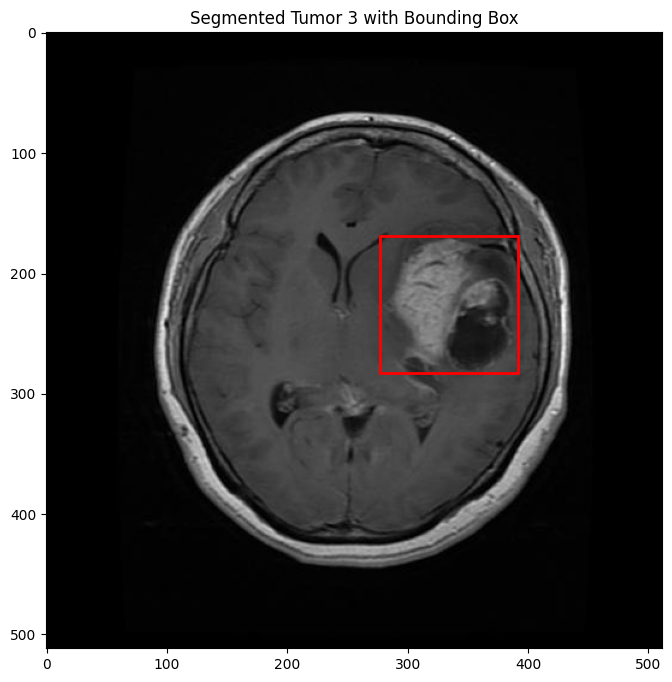

In [13]:

            print(f'Tumor {i+1} (Example {examplesSeg[i]}):')
            print(f'Width: {width} pixels')
            print(f'Height: {height} pixels')
            print(f'Tumor Area: {area} square pixels')
            fig, ax = plt.subplots(figsize=(8, 8))
            ax.imshow(examples[i])
            rect = plt.Rectangle((min_col, min_row), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.title(f'Segmented Tumor {i+1} with Bounding Box')
            plt.show()